### ***Theory of Gaussian Naive Bayes***

Applying Naive Bayes on a dataset means estimating $f: X \rightarrow Y$, or equivalently $P\{Y|X\}$, where $Y$ is a random variable and $X$ is a vector containing the attributes. By applying Bayes rule, we see that we can express $P\{Y=y_i|X=x_i\}$ as the following:
$$P\{Y=y_i|X=x_k\}=\frac{P\{X=x_k|Y=y_i\}\cdot P\{Y=y_i\}}{\sum_jP\{X=x_k|Y=y_j\}\cdot P\{Y=y_j\}}$$
where $y_i$ denotes the $i\text{-th}$ possible value of $Y$ and $x_k$ denotes the $k\text{-th}$ possible vector value for $X$. One way to learn $P\{Y|X\}$ is to use the training data to estimate $P\{X|Y\}$ and $P\{Y\}$: we can then employ them, together with Bayes rule above, to determine $P\{Y|X=x_k\}$ for any new instance $x_k$. A classifier like this will output the probability distribution over all possible values of $Y$ for each new instance $X$ that we ask it to classify. As in DT and RF, there is no need to perform standardization: it's internally done by the method.

Using a Bayes classifier to accurately estimate $P\{X|Y\}$ typically requires a lot of training examples. To overcome this problem, Naive Bayes classifiers assumes that each $X_i$ is conditionally independent of each of the others $X_k$ given the label $Y$ and also independent of each subset of the others $X_k$ given $Y$. Given three sets of random variable $X$, $Y$ and $Z$, we say that $X$ is conditionally independent of $Y$ given $Z$, if and only if the probability distribution governing $X$ is independent of the value of $Y$ given $Z$; that is:
$$P\{X=x_i|Y=y_j, Z=z_k\}=P\{X=x_i|Z=z_k\} \,\,\,\,\, \forall i, j, k$$

Conditional independence assumptions hold in our dataset since the correlation of all possible pairs of features is almost zero, except for `Amount` and `Time`. It's possible to apply PCA again to have a perfectly independent set of features.

With this hypothesis, we can write $P\{X|Y\}$ like:
$$P\{X|Y\}=P\{X_1, X_2, \dots, X_n|Y\}=\frac{P\{X_1, \dots,X_n\}}{P\{Y\}}=\frac{P\{X_1, \dots, X_n, Y\}}{P\{X_2, \dots, Y\}}\cdot \frac{P\{X_2, \dots, X_n, Y\}}{P\{Y\}}=$$
$$P\{X_1|X_2,\dots,Y\}\cdot P\{X_2, \dots X_n|Y\}=P\{X_1|Y\}\cdot P\{X_2|Y\}\cdots P\{X_n|Y\}=\prod_{i=1}^n P\{X_i|Y\}$$

where we have applied $n$ times the definition of conditional independence and a general property of probabilities.

---

Naive Bayes algorithm works the same for attributes $X$ being either discrete or real-valued. The expression for the probability that $Y$ will take its $k\text{-th}$ possible value (i.e. the posterior probability) is:
$$P\{Y=y_k|X_1,\dots,X_n\}=\frac{P\{X_1, \dots,X_n|Y=y_k\}\cdot P\{Y=y_k\}}{\sum_jP\{X_1,\dots,X_n|Y=y_j\}\cdot P\{Y=y_j\}}$$

where the sum is taken over all possible values $y_j$ os $Y$. By what have previously said about conditional independence, we can rewrite the expression as:
$$P\{Y=y_k|X_1,\dots,X_n\}=\frac{P\{Y=y_k\}\cdot \prod_i P\{X_i|Y=y_k\}}{\sum_j P\{Y=y_j\}\cdot \prod_i P\{X_i|Y=y_i\}}$$

that is the fundamental equation for the Naive Bayes classifier; $P\{Y\}$ (the prior) and $P\{X_i|Y\}$ (the likelihood) have been already estimated. 

If we are interested in only the most probable value of $Y$, then we have the Naive Bayes classification rule:
$$Y= \arg\max_{y_k}\frac{P\{Y=y_k\}\cdot \prod_i P\{X_i|Y=y_k\}}{\sum_j P\{Y=y_j\}\cdot \prod_i P\{X_i|Y=y_i\}}$$

Noticing that the denominator doesn't depend on $y_k$, we can get rid of it and write:
$$Y= \arg\max_{y_k}\,\,P\{Y=y_k\}\cdot \prod_i P\{X_i|Y=y_k\}$$

---

All of the features in our samples $X$ are continuous, so we need a way to represent the distributions of $P\{X_i|Y\}$. One common approach is to assume that for each possible discrete value $y_k$ of $Y$, the distribution of each continuous $X_i$ is Gaussian defined by mean and standard deviation specific to $X_i$ and $y_k$.  Such parameters can be estimated using conditional expected values:
$$\mu_{i,k}=\mathbb{E}[X_i|Y=y_k]\,\,\,\,\,\,\,\, \sigma_{i,k}^2=\mathbb{E}[(X_i-\mu_{i,k})^2|Y=y_k]$$

for each feature $X_i$ and possible label $y_k$ of $Y$. This means that there are $2|Y|n$ of this parameters and each of them has to be estimated independently. Among many estimators, the ones used in this notebook are the following:
1. MLE (Maximum Likelihood Estimator) for the mean:
$$\hat \mu_{i,k}=\frac{1}{\sum_j \mathbb{I}\{Y_j=y_k\}}\cdot\sum_j X_{i, j}\cdot\mathbb{I}\{Y_j=y_k\}$$

that is nothing more than the mean of $X_{i, j}$.

2. MLE for the variance:
$$\hat \sigma_{i, k}^2=\frac{1}{\sum_j \mathbb{I}\{Y_j=y_k\}}\cdot\sum_j (X_{i, j}-\hat \mu_{i, k})^2\cdot\mathbb{I}\{Y_j=y_k\}$$

that is biased.

3. MVUE (Minimum Variance Unbiased Estimator):
$$\hat \sigma_{i, k}^2=\frac{1}{\left(\sum_j \mathbb{I}\{Y_j=y_k\}\right) - 1}\cdot\sum_j (X_{i, j}-\hat \mu_{i, k})^2\cdot\mathbb{I}\{Y_j=y_k\}$$

where $Y_j$ means the label and $X_{i, j}$ means the value of $i\text{-th}$ feature of $j\text{-th}$ training sample.

Also, priors $\pi_k=P\{Y=y_k\}$ have to be estimated:
$$\hat \pi_k=\frac{\sum_j \mathbb{I}\{Y_j=y_k\}}{n}$$

### ***Model definition***

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class GaussianNaiveBayes:
    def __init__(self, classes):
        """
            Initializes the Naive Bayes classifier parameters.

            Args:
                classes (list): the classes the data is classified in.
                                Note: this parameter can be removed and its usages replaced with [0, 1], but since
                                NB can be used for multi-class problems, it seems reasonable to us keeping it. 
        """

        self.classes = classes

        #A dict that will contain the values of the priors indexed by class.
        self.priors = None

        #Each value will be an array of len(features) (the columns of X passed to self.fit())
        #containing the mean and the variance of Gaussian distribution associated to (y_k, X_i) as defined in the theory part
        self.means = None
        self.variances = None
    
    def fit(self, X, y): 
        """
            This methods fits NB to the training data.

            Args:
                X (np.ndarray): the matrix containing the training samples (on the rows).
                y (np.ndarray): the vector with the labels.
        """

        #Compute and store the priors (see theory part)
        self.priors = {}

        for c in self.classes:
            self.priors[c] = np.mean(y == c)
        
        #Compute and store mean and variance for each feature per class (see theory part)
        self.means = {}
        self.variances = {}

        max_var = np.var(X, axis = 0).max()
        
        for c in self.classes:
            X_c = X[y == c]
            self.means[c] = np.mean(X_c, axis = 0)

            #Note: here we could have used the NumPy built-in command for the variance estimation:
            #np.var(X_c, axis = 0, ddof = 1) where ddof = 1 means that at the denominator we want len(X_c) - 1
            #to get an unbiased estimator.
            #Note: 1e-9 * max_var is a smoothing parameter useful when variances have different scales (like Time and the Vs)
            self.variances[c] = np.sum((X_c - self.means[c]) ** 2, axis = 0) / (len(X_c) - 1) + 1e-9 * max_var

    def predict(self, X):
        """
            This method makes predictions on new data.

            Args:
                X (np.ndarray): the matrix containing the samples to predict (on the rows).

            Returns:
                predictions (np.ndarray): the array containing the predicted class.
                probabilities (np.ndarray): the probability associated to the prediction
        """

        if self.means == None or self.variances == None:
            raise ValueError("NB classifier has not been trained yet.")
        
        #Posterior is given by P{Y = y_k | X}, so we represent it in a matrix form where each row corresponds to a sample and 
        #each column corresponds the probability of a class y_k. 
        #Note: in the case of binary classification, we can reduce this matrix to a vector. For the sake of generality, we keep this form. 
        posteriors = np.empty((X.shape[0], len(self.classes)))
        
        for i, c in enumerate(self.classes):
            #Both priors and likelihoods can be really small numbers, so we'll work using the log 
            prior = np.log(self.priors[c])

            #For the likelihood, we have to compute log(*) = log(density(X, self.means[c], self.variances[c])) where
            #"density" is the Gaussian PDF, so by log(ab) = log(a) * log(b):
            #log(*) = log(1 / np.sqrt(2 * np.pi * self.variances[c] + 1e-8)) * log(np.exp((X - self.means[c]) ** 2 / (2 * self.variances[c] + 1e-8))) =
            #       = -1 / 2 * np.log(2 * np.pi * self.variances[c] + 1e-8) - (X - self.means[c]) ** 2 / (2 * self.variances[c] + 1e-8)
            likelihood = np.sum(-0.5 * np.log(2 * np.pi * self.variances[c] + 1e-8) - (X - self.means[c]) ** 2 / (2 * self.variances[c] + 1e-8), axis = 1)

            #Finally, we store the log of the posterior in the matrix. 
            #Note: we are saving one entire column at the time because we'are working column by column. "prior" is a single number, but "likelihood" is a vector
            #corresponding to the density evaluated in the sample
            posteriors[:, i] = prior + likelihood
        
        #Since probabilities can be very small (because we're working with log the numbers will be far negative), we use log-sum-exp trick for numerical stability
        #First, find the maximum value for each row: this will be then converted to 1 when we'll take the exp
        max_posteriors = np.max(posteriors, axis = 1, keepdims = True)
        
        #Then, subtract the maximum from each value and exp: all the resulting numbers will be less then (or equal to) 1 because posteriors - max_posteriors <= 0
        #To get the real probabilities, this numbers need to be rescaled by e^(-max_posteriors)
        exp_posteriors = np.exp(posteriors - max_posteriors)
        
        #Finally, normalize to get probabilities.
        #What we are computing here is e^(posteriors - max_posteriors) / sum(e^(posteriors - max_posteriors))) = e^(posteriors) / sum(e^(posteriors)) that is the 
        #probability we're interested in, but without risking underflow!
        probs = exp_posteriors / np.sum(exp_posteriors, axis = 1, keepdims = True)

        #The predicted class is the one with highest probability (see theory)
        return self.classes[np.argmax(probs, axis = 1)], probs[:, 1]
    
    def plot_gaussian_pdfs(self, feature_names, n_cols = 1):
        """
            Utility method to plot the probability density function associated to each class and features.
            PDFs of same feature will be displayed on the same plot.

            Args:
                feature_name (list): the names to be assigned to the features. This list should contain only
                                     the features used for training in that order.
                n_cols (tuple): specifies how many plots to be displayed on each row
        """

        n_rows = int(np.ceil(len(feature_names) / n_cols)) 

        fig, axs = plt.subplots(n_rows, n_cols, figsize = (5 * n_cols, 5 * n_rows))
        axs = axs.flatten()

        for i in range(len(feature_names)):
            for k in range(len(self.classes)):
                #This is a definition used only to avoid to repeat in the code a lot of times self.classes[k] given that the dicts are indexed by class
                c = self.classes[k]

                #Use a sufficiently large range for the x variable and compute the Gaussian PDF associated to self.means[c] and self.variances[c]
                x = np.linspace(self.means[c][i] - 5 * self.variances[c][i], self.means[c][i] + 5 * self.variances[c][i], 250)
                y = 1.0 / np.sqrt(2 * np.pi * self.variances[c][i]) * np.exp(-((x - self.means[c][i]) ** 2) / (2 * self.variances[c][i]))

                #Finally, plot all PDFs for same feature on the same plot
                #Note: there might be classes with PDF with small variance on the same plot as others with higher one!
                axs[i].plot(x, y, "--", label = f"class: {self.classes[k]}")
                axs[i].set_title(f"Feature name: {feature_names[i]}")
                axs[i].set_xlabel("x")
                axs[i].set_ylabel("PDF")
            
            axs[i].legend()

        #Remove empty subplots if any
        for i in range(len(feature_names), n_rows * n_cols):
            fig.delaxes(axs[i])

        plt.tight_layout()
        plt.plot()

### ***Usage of the model***

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

import sys
sys.path.append("..")

from utils.preprocessing import undersample, fit_resample

import utils.model_evaluation as me
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load the dataset
init_data = pd.read_csv("../creditcard_2021.csv")
data = init_data[me.feature_vectors["v3"] + ["Class"]]

#"Class" column is the target variable, so we remove it from the feature matrix and store it in the variable y
X = data.drop(columns = ["Class"])
y = data["Class"]

X = np.array(X)
y = np.array(y)

In [5]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

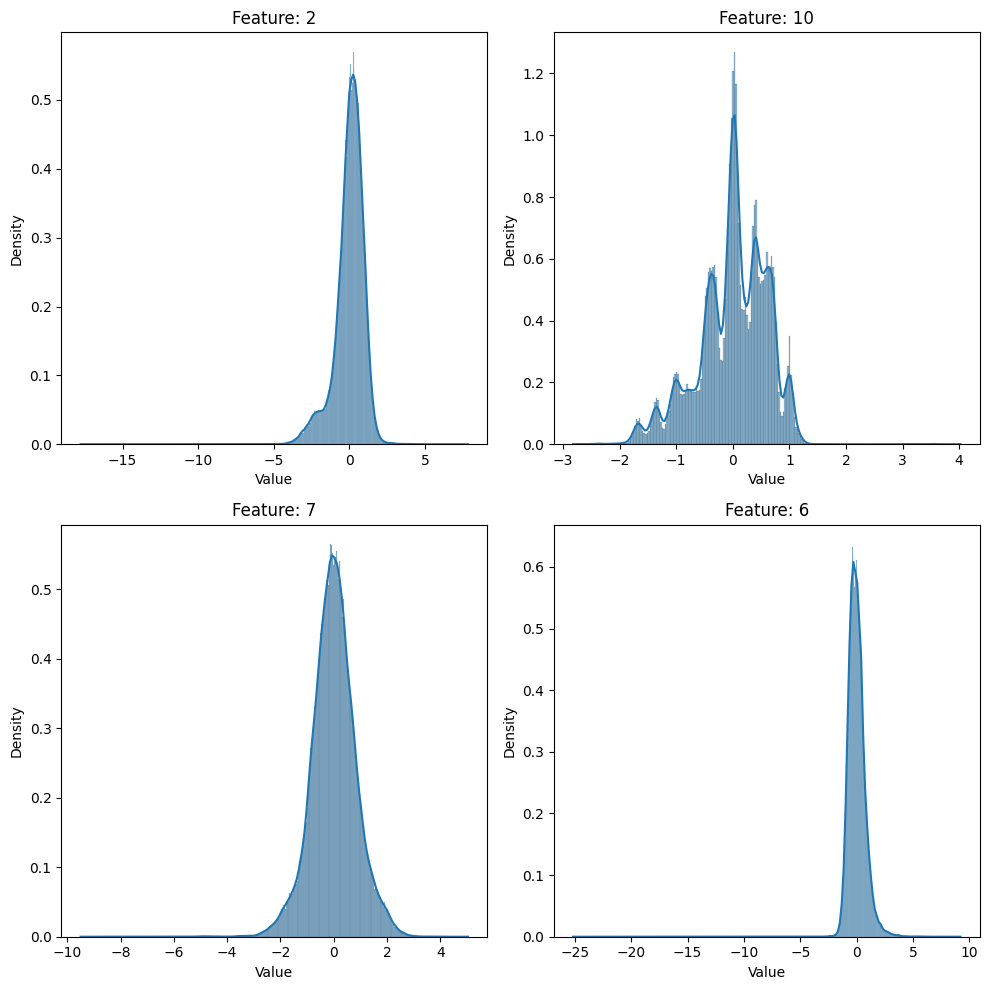

In [6]:
#In this cell, we're going to see how the feature values are distributed. 
#With sns, we'll plot an histogram and interpolate it to see if a Gaussian distribution can be fitted or not.

Z = np.array(init_data)

fig, axs = plt.subplots(2, 2, figsize = (10, 10))
axs = axs.flatten()

features = np.random.choice(range(X_train.shape[1]), size = 4, replace = False)

for i, f in enumerate(features):
    #kde = True means that we want an interpolation and stat = "density" means that the frequencies will be normalized in [0, 1]
    sns.histplot(data = X_train[:, f], kde = True, ax = axs[i], stat = 'density')
    axs[i].set_title(f'Feature: {f}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

#As you can notice, there are some columns for which the distribution is not really a Gaussian one, like (V22, V1, ...), while for some others it is true. 

In [7]:
#Note: in contrast with what have been done for RF, here we don't apply SMOTE because we have observed experimentally that it decreases both the recall and the precision on the testing set.
#If you want to give it a try, uncomment the following
#X_smote = fit_resample(X_train[y_train == 1], 2500, 10)

#X_train = np.vstack((X_train, X_smote))
#y_train = np.hstack((y_train, [1] * 2500))

In [8]:
#Another thing that we can try to do is undersampling (we have observed experimentally that it promotes precision with a slight decrease on recall)
#X_train, y_train = undersample(X_train, y_train, 0, 1 - (sum(y_train) * 300.0 / X_train.shape[0]))

In [9]:
nb = GaussianNaiveBayes(classes = np.unique(y))

In [10]:
#Once defined, we can train the model
nb.fit(X_train, y_train)

In [11]:
#Once trained, we can make predictions
y_pred, y_prob = nb.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(85443,))

Precision: 0.09850993377483444
Recall: 0.8095238095238095
F1 Score: 0.17564575645756458
Accuracy: 0.9869269571527217
AUC Score: 0.9526915953025367


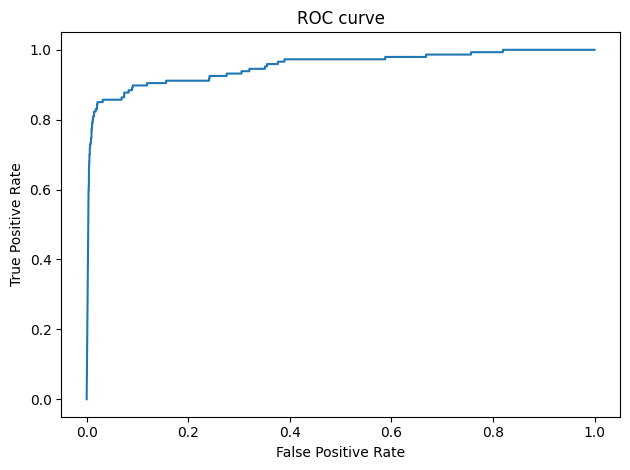

In [12]:
metrics = me.compute_metrics(y_test, y_pred)

print("Precision:", metrics["precision"][0])
print("Recall:", metrics["recall"][0])
print("F1 Score:", metrics["f1-score"][0])
print("Accuracy:", metrics["accuracy"][0])

fpr, tpr, auc = me.compute_roc_auc(y_test, y_prob)
print("AUC Score:", auc)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.tight_layout()
plt.show()

In [13]:
params = {
    "classes" : np.unique(y)
}

metrics_training = pd.DataFrame()
metrics_testing = pd.DataFrame()

roc_auc_training = {}
roc_auc_testing = {}

X_2 = init_data.drop(columns = ["Class"])
y_2 = data["Class"]

X_2 = np.array(X_2)
y_2 = np.array(y_2)

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size = 0.3, random_state = 0)

for key, value in me.feature_vectors.items():
    print(f"Current feature vector: {value}")

    X_tr = X_train[:, np.array(me.feature_masks[key]).astype(bool)]
    X_te = X_test[:, np.array(me.feature_masks[key]).astype(bool)]

    rf = GaussianNaiveBayes(**params)

    rf.fit(X_tr, y_train)
    y_pred, y_prob = rf.predict(X_tr)

    metrics_training = me.compute_metrics(y_train, y_pred, metrics_df = metrics_training, dataset_label = key)
    roc_auc_training[key] = me.compute_roc_auc(y_train, y_prob)

    y_pred, y_prob = rf.predict(X_te)

    metrics_testing = me.compute_metrics(y_test, y_pred, metrics_df = metrics_testing, dataset_label = key)
    roc_auc_testing[key] = me.compute_roc_auc(y_test, y_prob)

Current feature vector: ['V1', 'V5', 'V7', 'V8', 'V11', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'Amount']
Current feature vector: ['V1', 'V6', 'V13', 'V16', 'V17', 'V22', 'V23', 'V28', 'Amount']
Current feature vector: ['V2', 'V11', 'V12', 'V13', 'V15', 'V16', 'V17', 'V18', 'V20', 'V21', 'V24', 'V26', 'Amount']
Current feature vector: ['V2', 'V7', 'V10', 'V13', 'V15', 'V17', 'V19', 'V28', 'Amount']
Current feature vector: ['Time', 'V1', 'V7', 'V8', 'V9', 'V11', 'V12', 'V14', 'V15', 'V22', 'V27', 'V28', 'Amount']
Current feature vector: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Current feature vector: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V2

In [14]:
#Training metrics
metrics_training

,set of features,tp,tn,fp,fn,accuracy,recall,precision,f1-score,total transaction,fraud transactions
0,v1,291,195207,3812,54,0.980608,0.843478,0.070924,0.130845,199364,345
1,v2,246,196155,2864,99,0.985138,0.713043,0.079100,0.142402,199364,345
2,v3,278,196410,2609,67,0.986577,0.805797,0.096294,0.172030,199364,345
3,v4,267,195728,3291,78,0.983101,0.773913,0.075042,0.136818,199364,345
4,v5,207,197935,1084,138,0.993871,0.600000,0.160341,0.253056,199364,345
5,v6,219,197691,1328,126,0.992707,0.634783,0.141564,0.231501,199364,345
6,v7,285,194632,4387,60,0.977694,0.826087,0.061002,0.113614,199364,345


In [15]:
#Testing metrics
metrics_testing

,set of features,tp,tn,fp,fn,accuracy,recall,precision,f1-score,total transaction,fraud transactions
0,v1,123,83698,1598,24,0.981017,0.836735,0.071470,0.131692,85443,147
1,v2,103,84053,1243,44,0.984937,0.700680,0.076523,0.137977,85443,147
2,v3,119,84207,1089,28,0.986927,0.809524,0.098510,0.175646,85443,147
3,v4,111,83884,1412,36,0.983053,0.755102,0.072882,0.132934,85443,147
4,v5,86,84831,465,61,0.993844,0.585034,0.156080,0.246418,85443,147
5,v6,95,84750,546,52,0.993001,0.646259,0.148206,0.241117,85443,147
6,v7,123,83475,1821,24,0.978407,0.836735,0.063272,0.117647,85443,147


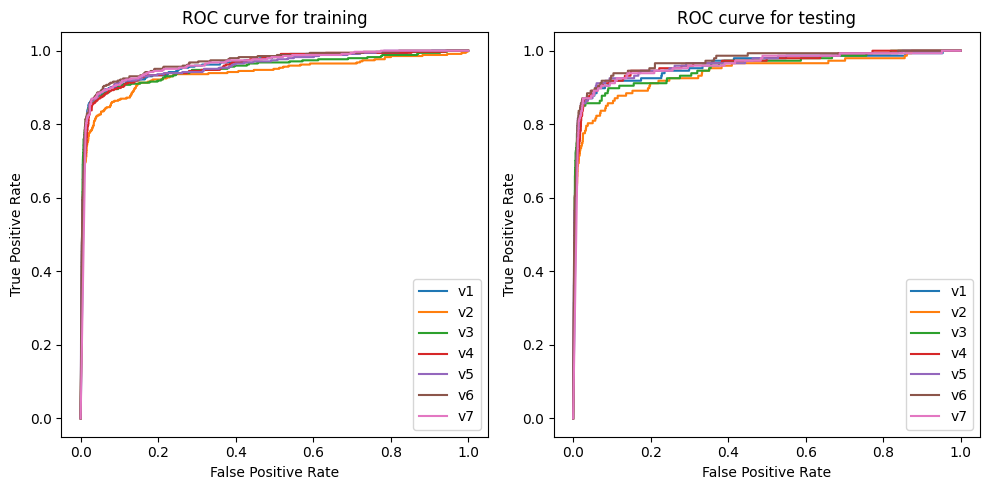

Training AUC:
v1 -> 0.9606057494619806
v2 -> 0.9375705298256063
v3 -> 0.9520704635949477
v4 -> 0.9581783794439261
v5 -> 0.9592154080984621
v6 -> 0.9678013045291503
v7 -> 0.9617700472993949

Testing AUC:
v1 -> 0.9570860162673211
v2 -> 0.9384852445011019
v3 -> 0.9526915953025367
v4 -> 0.9618770951449424
v5 -> 0.9633110372267459
v6 -> 0.9702776932382408
v7 -> 0.9589646283386737


In [16]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

#ROC curve for training
for i in roc_auc_training.keys():
    axs[0].plot(roc_auc_training[i][0], roc_auc_training[i][1], label = i)
    axs[0].set_xlabel("False Positive Rate")
    axs[0].set_ylabel("True Positive Rate")
    axs[0].set_title("ROC curve for training")
    axs[0].legend()

#ROC curve for testing
for i in roc_auc_testing.keys():
    axs[1].plot(roc_auc_testing[i][0], roc_auc_testing[i][1], label = i)
    axs[1].set_xlabel("False Positive Rate")
    axs[1].set_ylabel("True Positive Rate")
    axs[1].set_title("ROC curve for testing")
    axs[1].legend()

plt.tight_layout()
plt.show()

print("Training AUC:")
for i, auc in roc_auc_training.items():
    print(f"{i} -> {auc[2]}")

print("\nTesting AUC:")
for i, auc in roc_auc_testing.items():
    print(f"{i} -> {auc[2]}")

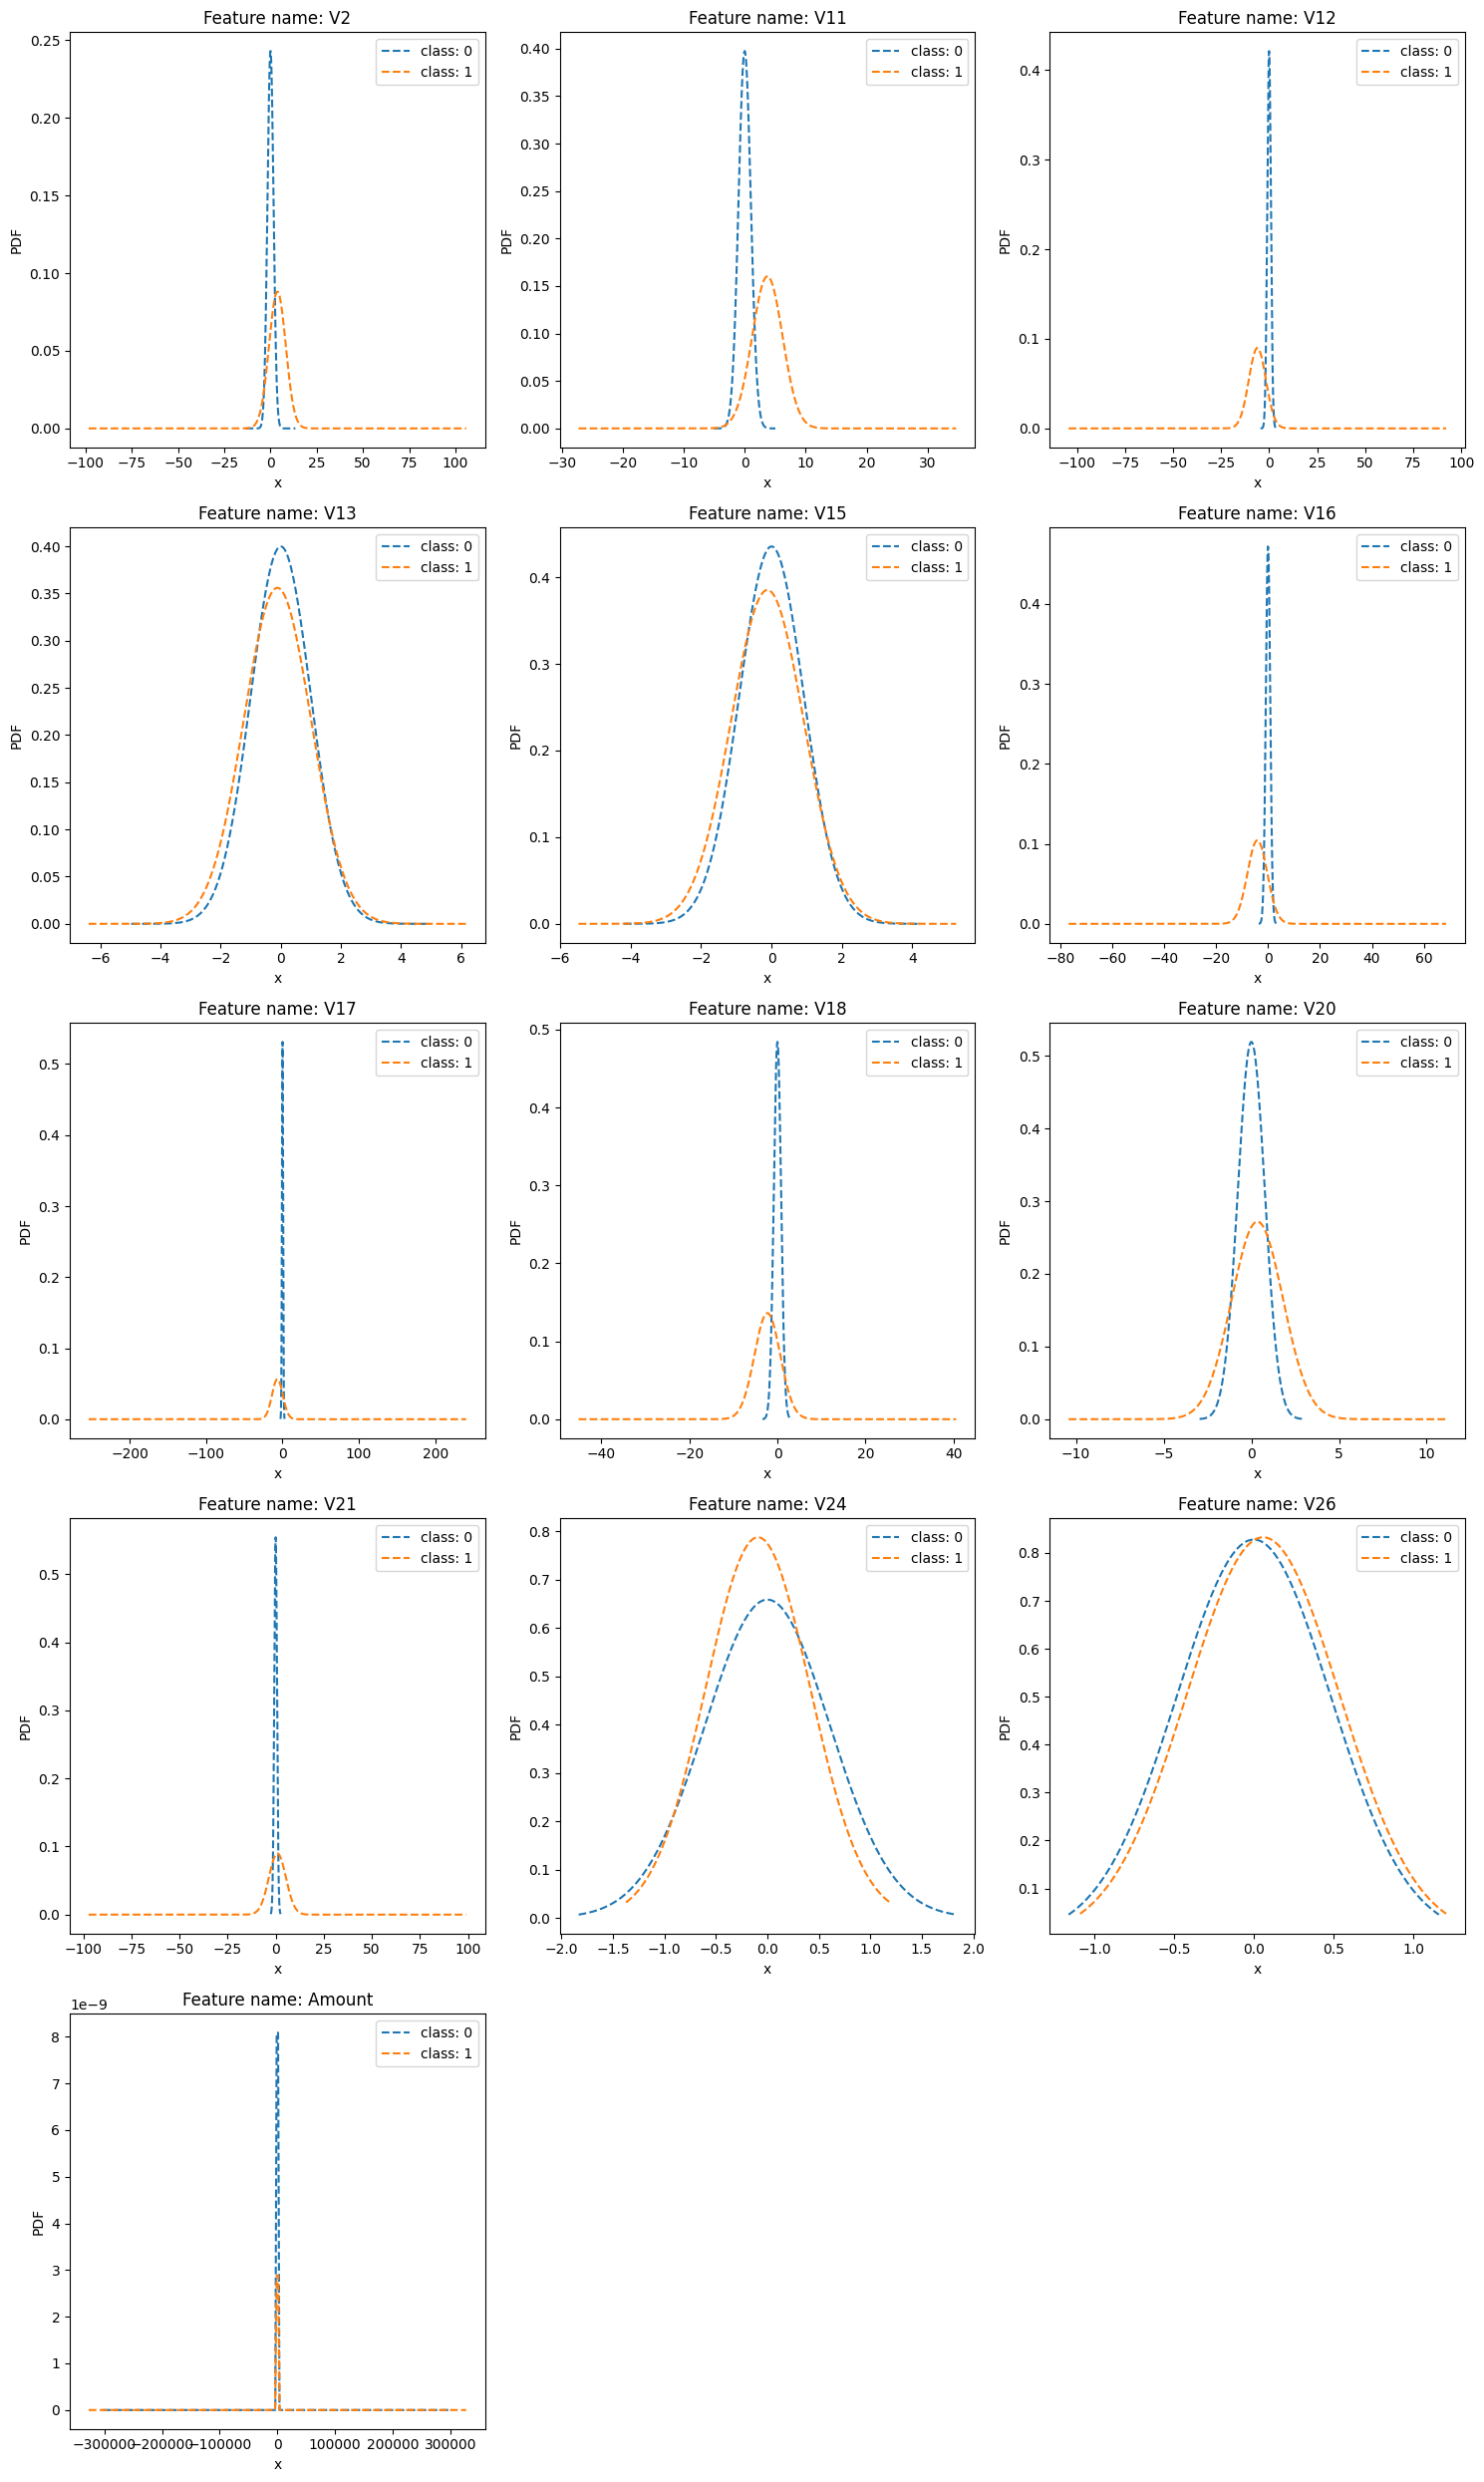

In [17]:
nb.plot_gaussian_pdfs(me.feature_vectors["v3"], n_cols = 3)